In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# 1.1 Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [3]:
broken_df = pd.read_csv('../data/bikes.csv',encoding = "ISO-8859-1")

In [4]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [5]:
fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [6]:
fixed_df.head(7)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
2012-01-06,146,NaN,0,98,244,86,4,75,NaN
2012-01-07,98,NaN,2,80,108,53,6,54,NaN


# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [7]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
              ... 
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310, dtype: int64

In [8]:
fixed_df[['Berri 1', 'du Parc']].tail()

,Berri 1,du Parc
Date,,
2012-11-01,2405,2076
2012-11-02,1582,1392
2012-11-03,844,713
2012-11-04,966,692
2012-11-05,2247,2143


In [9]:
fixed_df[['du Parc', 'Berri 1']].tail()

,du Parc,Berri 1
Date,,
2012-11-01,2076,2405
2012-11-02,1392,1582
2012-11-03,713,844
2012-11-04,692,966
2012-11-05,2143,2247


In [10]:
fixed_df.columns

Index(['Berri 1', 'Brébeuf (données non disponibles)', 'Côte-Sainte-Catherine',
       'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1',
       'St-Urbain (données non disponibles)'],
      dtype='object')

# 1.2.1 More on Selections

In [11]:
fixed_df.columns[:4]

Index(['Berri 1', 'Brébeuf (données non disponibles)', 'Côte-Sainte-Catherine',
       'Maisonneuve 1'],
      dtype='object')

In [12]:
fixed_df[fixed_df.columns[0:7:2]].sample(2)

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 2,Pierre-Dupuy
Date,,,,
2012-10-04,4034,2025,4850,555
2012-08-16,6062,2538,6549,1549


## 1.2.2 Filter by Columns

In [13]:
# [rows, columns] and loc refers to column name base filtering
fixed_df.loc[:, ['du Parc', 'Berri 1']].tail()

,du Parc,Berri 1
Date,,
2012-11-01,2076,2405
2012-11-02,1392,1582
2012-11-03,713,844
2012-11-04,692,966
2012-11-05,2143,2247


In [14]:
# [rows, columns] and iloc refers to index base filtering
fixed_df.iloc[:,[0,1,7]].sample()

,Berri 1,Brébeuf (données non disponibles),Rachel1
Date,,,
2012-06-22,5398,NaN,5263


## 1.2.3 Filter by Columns and Rows

In [15]:
# [rows, columns] and iloc refers to index base filtering
fixed_df.iloc[1:4,[0,1,7]]

,Berri 1,Brébeuf (données non disponibles),Rachel1
Date,,,
2012-01-02,83,NaN,43
2012-01-03,135,NaN,58
2012-01-04,144,NaN,61


In [16]:
# [rows, columns] and iloc refers to index base filtering
fixed_df.iloc[1:7:2,[0,1,7]]

,Berri 1,Brébeuf (données non disponibles),Rachel1
Date,,,
2012-01-02,83,NaN,43
2012-01-04,144,NaN,61
2012-01-06,146,NaN,75


In [17]:
# [rows, columns] and iloc refers to index base filtering
fixed_df.loc[fixed_df['Berri 1'] < 70, fixed_df.columns[:2]]

,Berri 1,Brébeuf (données non disponibles)
Date,,
2012-01-01,35,NaN
2012-01-14,32,NaN
2012-01-15,54,NaN
2012-01-21,53,NaN
2012-02-25,62,NaN


In [18]:
# [rows, columns] and iloc refers to index base filtering
fixed_df.loc[fixed_df['Berri 1'] < 70, fixed_df.columns[6:9]]

,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,
2012-01-01,10,16,NaN
2012-01-14,0,1,NaN
2012-01-15,0,0,NaN
2012-01-21,1,0,NaN
2012-02-25,2,5,NaN


In [19]:
# notice the parantesis on each condition
fixed_df.loc[
    # row filters before comma [here,]
    (fixed_df['Rachel1'] < 10) & (fixed_df['Berri 1'] < 70) 
    ,
    # column filters after comma [, here]
    fixed_df.columns[6:9]
]

,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,
2012-01-14,0,1,NaN
2012-01-15,0,0,NaN
2012-01-21,1,0,NaN
2012-02-25,2,5,NaN


# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

<AxesSubplot:xlabel='Date'>

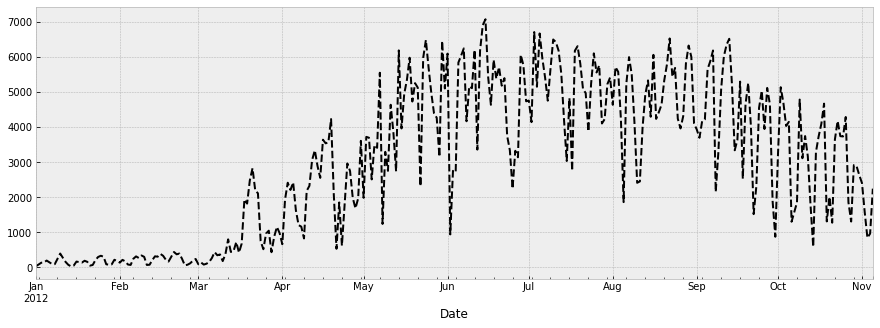

In [20]:
fixed_df['Berri 1'].plot(style="k--")

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

<AxesSubplot:xlabel='Date'>

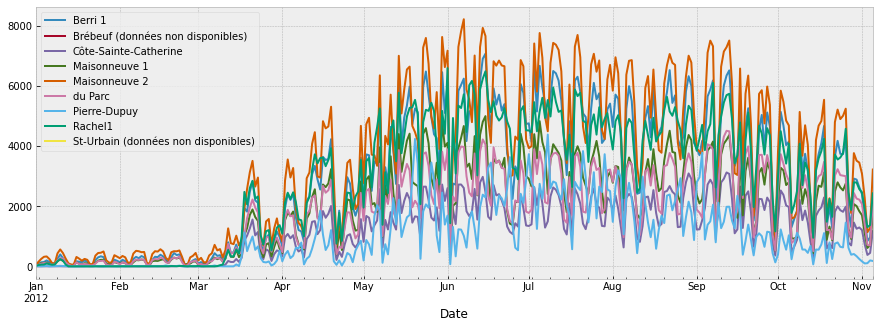

In [21]:
fixed_df.plot(figsize=(15, 5))